# **Trabalho Prático 2 - IA**

In [303]:
!pip install gymnasium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import gymnasium as gym

# 1) Aprendizado Supervisionado - Regressão

In [304]:
# Carregar o conjunto de dados
df = pd.read_csv('https://drive.google.com/uc?export=download&id=15MEB8QTmQh9jhu3TGxyvT0N3suZbDnxb')

# Visualizar as primeiras linhas e informações básicas
df.head()

,ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,...,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,...,0.0,0.0,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


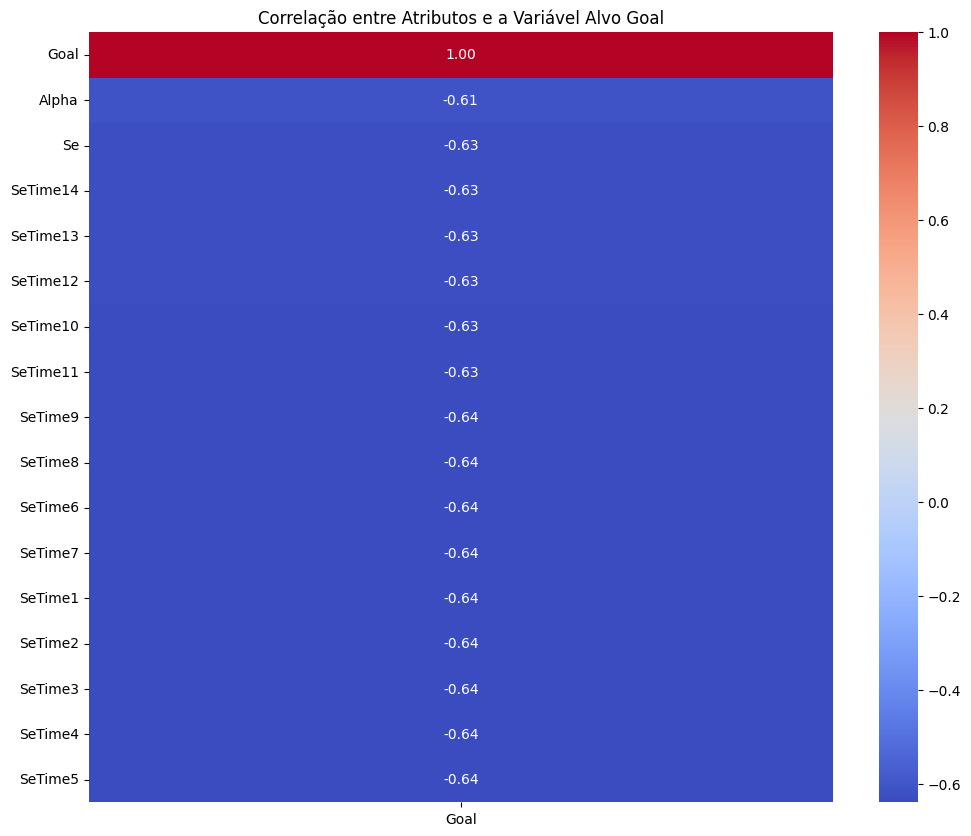

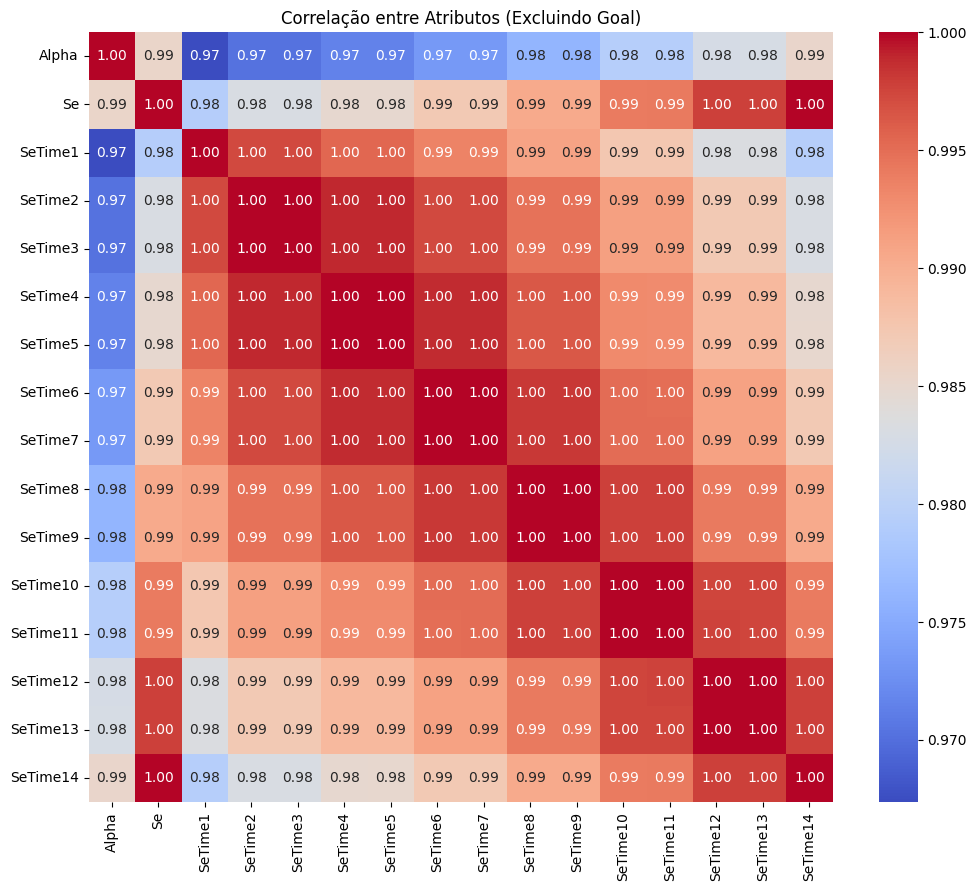

In [305]:
# Verificar a correlação entre os atributos e a variável alvo 'Goal'
correlation_matrix = df[['Alpha', 'Se'] + [f'SeTime{i}' for i in range(1, 15)] + ['Goal']].corr()

# Visualizar a correlação com a variável alvo 'Goal'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Goal']].sort_values(by='Goal', ascending=False), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Atributos e a Variável Alvo Goal')
plt.show()

# Verificar a correlação entre os atributos entre si
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.drop('Goal', axis=1).drop('Goal', axis=0), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Atributos (Excluindo Goal)')
plt.show()

In [306]:
# Selecionar os atributos DiffSeTime[2i] e a variável alvo 'Goal'
diff_se_time_attrs = [f'DiffSeTime{i}' for i in range(2, 15, 2)]
attributes = diff_se_time_attrs + ['Goal']
df_subset = df[attributes]

# Calcular a correlação com a variável alvo 'Goal'
correlation_matrix = df_subset.corr()
print("Correlação com a variável alvo 'Goal':")
print(correlation_matrix[['Goal']].sort_values(by='Goal', ascending=False))


Correlação com a variável alvo 'Goal':
                      Goal
Goal          1.000000e+00
DiffSeTime6   2.197444e-02
DiffSeTime14  1.988290e-02
DiffSeTime12  1.249316e-02
DiffSeTime10  9.863418e-03
DiffSeTime4   8.308086e-03
DiffSeTime2   2.957532e-03
DiffSeTime8   7.049853e-17


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [307]:
# Carregar as variáveis de interesse que estão instrucoes.txt
variaveis_interesse = ['ClimbRate', 'Sgz', 'P', 'Q', 'CurPitch', 'CurRoll', 'AbsRoll', 'DiffClb', 'DiffRollRate', 'DiffDiffClb',
           'DiffSeTime1', 'DiffSeTime3', 'DiffSeTime5', 'DiffSeTime7', 'DiffSeTime9', 'DiffSeTime11', 'DiffSeTime13', 'Alpha', 'Se', 'Goal']

# Subconjunto de dados apenas com as variáveis de interesse
df_interesse = df[variaveis_interesse]

# Matriz de correlação entre as variáveis de interesse
corr_matrix_interesse = df_interesse.corr()

df = df[variaveis_interesse]

print("Matriz de Correlação das Variáveis de Interesse:")
corr_matrix_interesse[['Goal']]


Matriz de Correlação das Variáveis de Interesse:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Goal
ClimbRate,-0.072129
Sgz,0.063707
P,-0.317066
Q,-0.396222
CurPitch,-0.313684
CurRoll,-0.100622
AbsRoll,0.703023
DiffClb,0.059642
DiffRollRate,0.045342
DiffDiffClb,0.063849


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


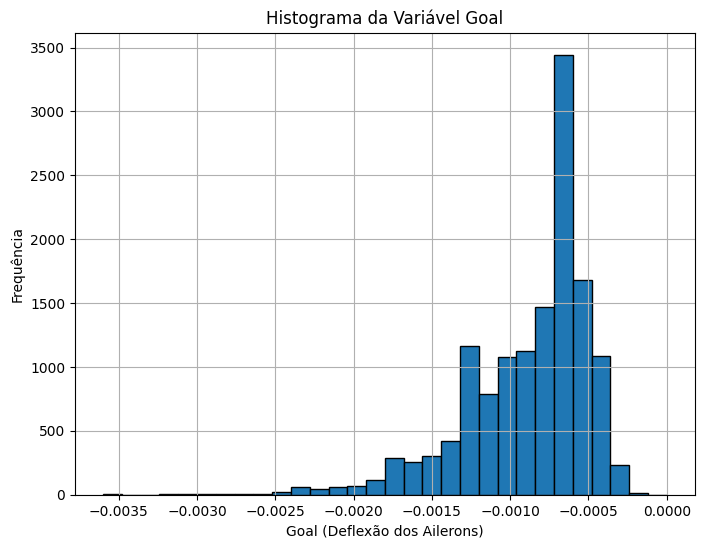

Valor de Goal que minimiza o MAE: -0.0008
Valor de Goal que minimiza o MSE: -0.0008718690909090909


In [308]:
# Plotando o histograma da variável Goal
plt.figure(figsize=(8, 6))
plt.hist(df['Goal'], bins=30, edgecolor='black')
plt.xlabel('Goal (Deflexão dos Ailerons)')
plt.ylabel('Frequência')
plt.title('Histograma da Variável Goal')
plt.grid(True)
plt.show()

median_goal = df['Goal'].median()
print(f'Valor de Goal que minimiza o MAE: {median_goal}')
mean_goal = df['Goal'].mean()
print(f'Valor de Goal que minimiza o MSE: {mean_goal}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


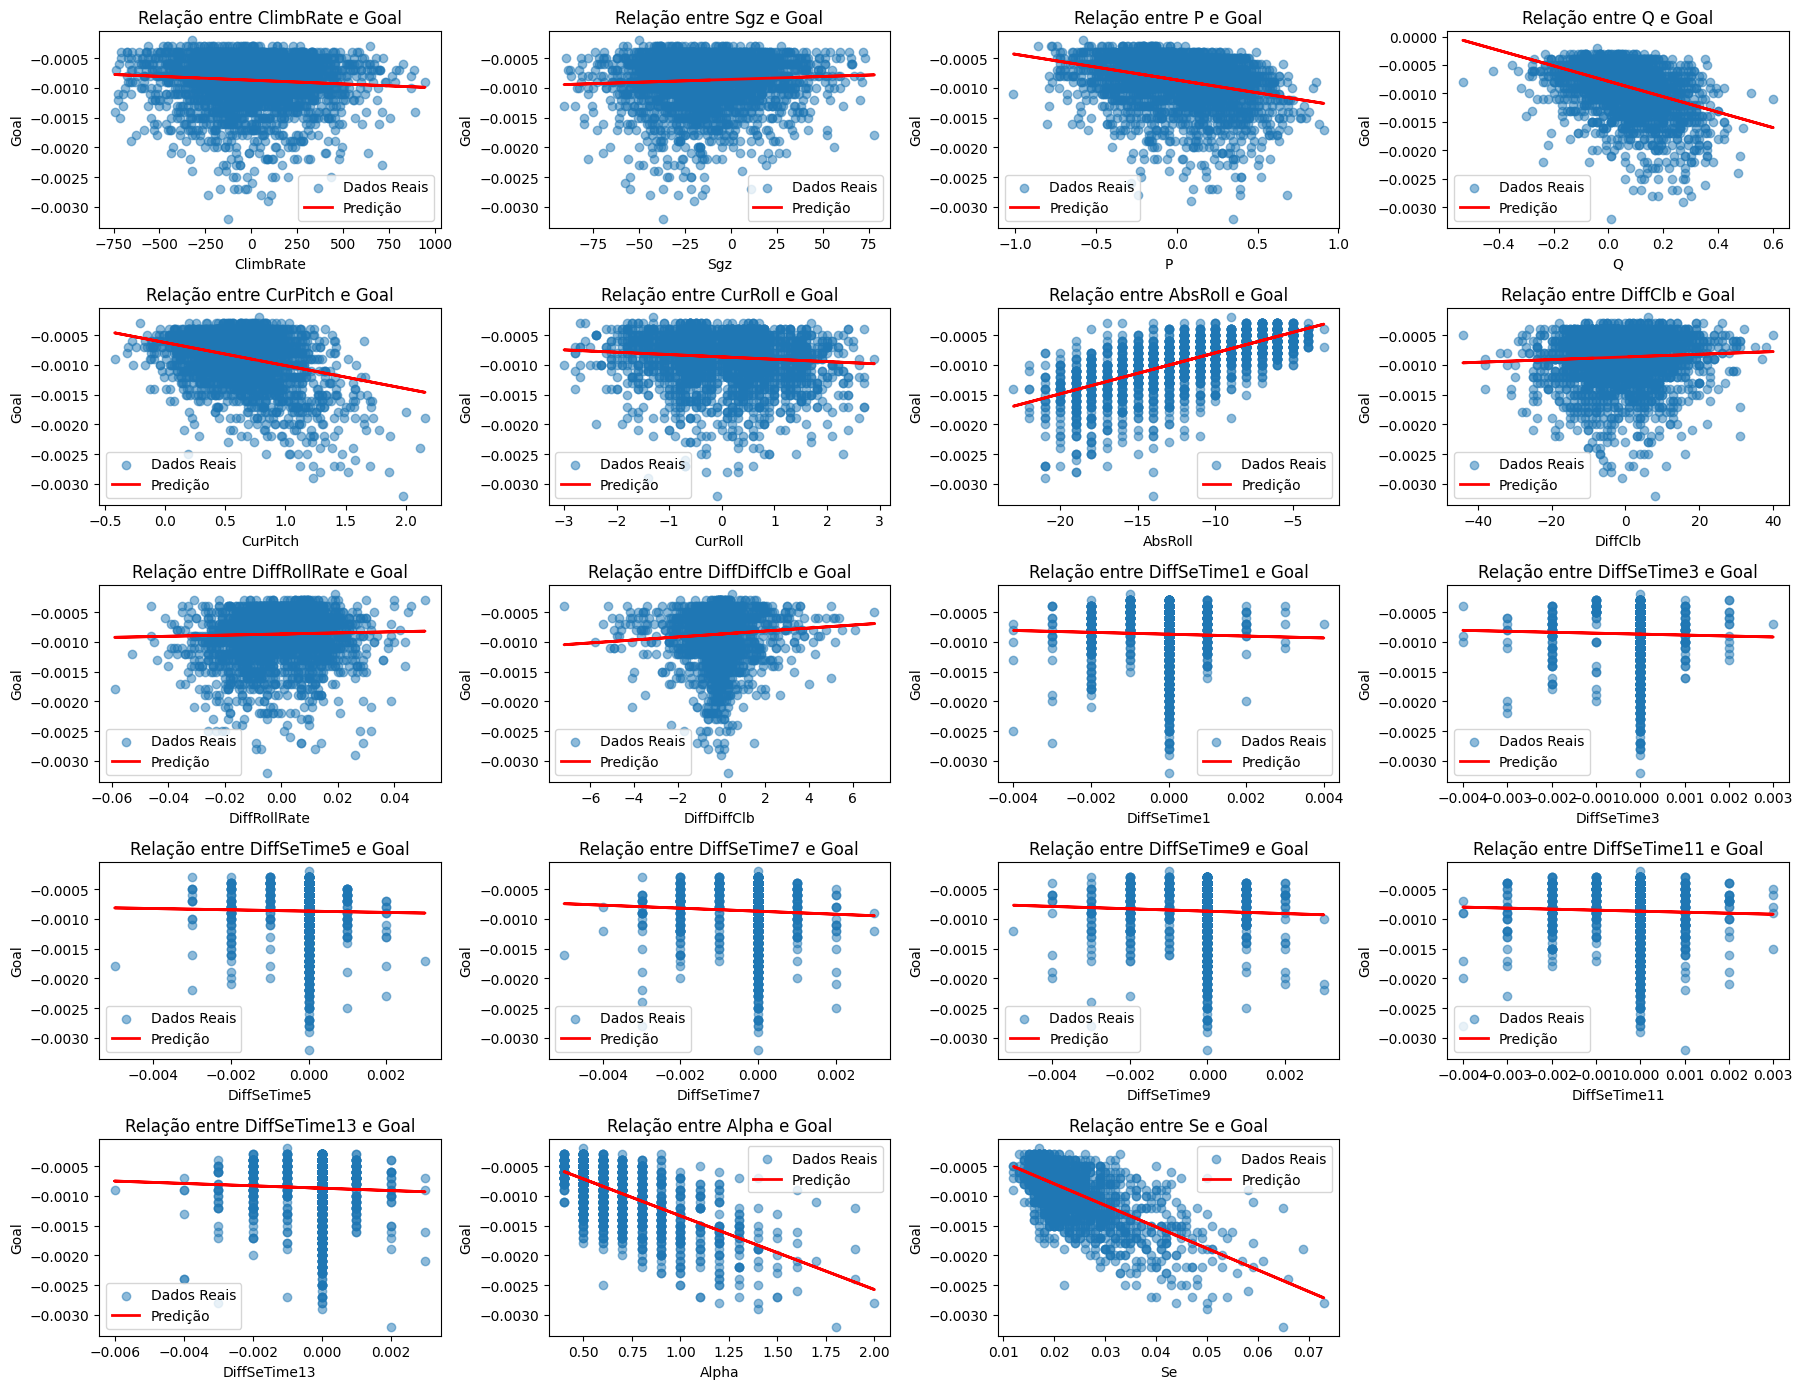

Resultados dos Modelos:
        Variable   Coefficient           MSE
0      ClimbRate -1.271494e-07  1.750626e-07
1            Sgz  9.671957e-07  1.740818e-07
2              P -4.325042e-04  1.609630e-07
3              Q -1.357975e-03  1.470059e-07
4       CurPitch -3.873792e-04  1.521543e-07
5        CurRoll -3.948412e-05  1.724621e-07
6        AbsRoll  6.894910e-05  8.731163e-08
7        DiffClb  2.251764e-06  1.741998e-07
8   DiffRollRate  9.435233e-04  1.740553e-07
9    DiffDiffClb  2.498618e-05  1.747624e-07
10   DiffSeTime1 -1.575550e-02  1.750376e-07
11   DiffSeTime3 -1.591895e-02  1.751291e-07
12   DiffSeTime5 -1.083717e-02  1.748884e-07
13   DiffSeTime7 -2.537227e-02  1.751184e-07
14   DiffSeTime9 -2.007518e-02  1.749780e-07
15  DiffSeTime11 -1.708586e-02  1.749398e-07
16  DiffSeTime13 -1.997029e-02  1.750009e-07
17         Alpha -1.238747e-03  1.021020e-07
18            Se -3.617840e-02  9.860029e-08


In [309]:
# Subconjunto de dados apenas com as variáveis de interesse
df_interesse = df[variaveis_interesse]

# Inicializar uma lista para armazenar os resultados dos modelos
results = []

# Loop para ajustar um modelo para cada variável de interesse e calcular o MSE
plt.figure(figsize=(18, 14))
for i, var in enumerate(variaveis_interesse[:-1], 1):  # Excluindo 'Goal' das variáveis preditoras
    # Definindo X e y para a variável atual
    X_single = df_interesse[[var]]
    y = df_interesse['Goal']

    # Dividindo os dados em conjunto de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

    # Criando o modelo de regressão linear
    model = LinearRegression()

    # Treinando o modelo com os dados de treino
    model.fit(X_train, y_train)

    # Predizendo os valores de teste
    y_pred = model.predict(X_test)

    # Calculando o MSE para avaliação
    mse = mean_squared_error(y_test, y_pred)

    # Adicionando os resultados à lista
    results.append({'Variable': var, 'Coefficient': model.coef_[0], 'MSE': mse})

    # Plotando o gráfico de dispersão e a linha de regressão
    plt.subplot(5, 4, i)  # Ajuste o layout conforme necessário
    plt.scatter(X_test, y_test, alpha=0.5, label='Dados Reais')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predição')
    plt.xlabel(var)
    plt.ylabel('Goal')
    plt.title(f'Relação entre {var} e Goal')
    plt.legend()

plt.tight_layout()
plt.show()

# Convertendo os resultados em um DataFrame para visualização
results_df = pd.DataFrame(results)

# Exibindo os resultados
print("Resultados dos Modelos:")
print(results_df)

In [310]:
# Separando as variáveis preditoras e a variável alvo
# Variáveis que não são "Goal" (todas as colunas menos a coluna 'Goal')
X = df_interesse.drop(columns=['Goal'])

# Variável alvo (a coluna 'Goal')
y = df_interesse['Goal']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear
linear_model = LinearRegression()

# Treinando o modelo com os dados de treino
linear_model.fit(X_train, y_train)

# Predizendo os valores de teste
y_pred_linear = linear_model.predict(X_test)

# Calculando o MSE para avaliação
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f'MSE da Regressão Linear: {mse_linear}')


MSE da Regressão Linear: 3.015931785415615e-08


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [311]:
# Definindo os valores de alpha
alphas = [0.2, 1, 5]

ridge_mse_results = {}

# Ajustando o modelo para cada valor de alpha
for alpha in alphas:
    # Criando o modelo Ridge com o alpha atual
    model = Ridge(alpha=alpha)

    # Ajustando o modelo com os dados de treino
    model.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = model.predict(X_train)

    # Calculando o erro quadrático médio
    mse = mean_squared_error(y_train, y_pred)

    # Armazenando o resultado
    ridge_mse_results[alpha] = mse

# Exibindo os resultados
for alpha, mse in ridge_mse_results.items():
    print(f'Alpha: {alpha}, MSE: {mse}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alpha: 0.2, MSE: 3.1023981962867467e-08
Alpha: 1, MSE: 3.116919144045789e-08
Alpha: 5, MSE: 3.140134286105007e-08


In [312]:
# Configurações de hiperparâmetros para testar
params = [
    [50, 4, 0.2],
    [50, 10, 1],
    [50, 10, 0.2],
    [50, 10, 0.04],
    [200, 4, 1],
    [200, 4, 0.2],
    [200, 4, 0.04],
    [200, 10, 0.2]
]

# Dicionário para armazenar os resultados
xgboost_results = {}

# Loop para criar e avaliar os modelos XGBoost
for n_estimators, max_depth, learning_rate in params:
    # Criando o modelo XGBoost
    xgb_model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

    # Treinando o modelo com os dados de treino
    xgb_model.fit(X_train, y_train)

    # Predizendo os valores de teste
    y_pred_xgb = xgb_model.predict(X_test)

    # Calculando o MSE para avaliação
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)

    # Salvando os resultados
    xgboost_results[(n_estimators, max_depth, learning_rate)] = {
        'modelo': xgb_model,
        'MSE': mse_xgb
    }

# Exibindo os resultados
for params, result in xgboost_results.items():
    print(f"Para XGBoost com n_estimators={params[0]}, max_depth={params[1]}, learning_rate={params[2]}:")
    print(f"MSE do Modelo: {result['MSE']}")
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Para XGBoost com n_estimators=50, max_depth=4, learning_rate=0.2:
MSE do Modelo: 2.8424383243847024e-08

Para XGBoost com n_estimators=50, max_depth=10, learning_rate=1:
MSE do Modelo: 3.6249735110898214e-08

Para XGBoost com n_estimators=50, max_depth=10, learning_rate=0.2:
MSE do Modelo: 2.7649701722835755e-08

Para XGBoost com n_estimators=50, max_depth=10, learning_rate=0.04:
MSE do Modelo: 3.3060326815347586e-08

Para XGBoost com n_estimators=200, max_depth=4, learning_rate=1:
MSE do Modelo: 3.377574027202073e-08

Para XGBoost com n_estimators=200, max_depth=4, learning_rate=0.2:
MSE do Modelo: 2.842438421381595e-08

Para XGBoost com n_estimators=200, max_depth=4, learning_rate=0.04:
MSE do Modelo: 2.786184227452055e-08

Para XGBoost com n_estimators=200, max_depth=10, learning_rate=0.2:
MSE do Modelo: 2.7649704215279086e-08



In [313]:
# Lista para armazenar variáveis cujos intervalos de confiança incluem 0
variables_with_zero_ci = []

# Loop para ajustar um modelo para cada variável e calcular os intervalos de confiança
for var in variaveis_interesse:
    # Adicionando uma constante aos dados de treino para ajustar o intercepto
    X_train_with_const = sm.add_constant(df[[var]])

    # Criando o modelo de regressão linear usando OLS (Ordinary Least Squares)
    model = sm.OLS(df['Goal'], X_train_with_const)
    results = model.fit()

    # Obter o intervalo de confiança para os coeficientes
    conf_int = results.conf_int()

    # Verificar se o intervalo de confiança para o coeficiente da variável inclui 0
    if conf_int.loc[var, 0] <= 0 <= conf_int.loc[var, 1]:
        variables_with_zero_ci.append(var)

    # Exibindo o summary para análise dos coeficientes e intervalos de confiança
    print(f"Para {var}:")
    print(results.summary())
    print()

# Exibir as variáveis cujos intervalos de confiança incluem 0
print("Variáveis cujos intervalos de confiança incluem 0:")
print(variables_with_zero_ci)


Para ClimbRate:
                            OLS Regression Results                            
Dep. Variable:                   Goal   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     71.90
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.49e-17
Time:                        04:57:14   Log-Likelihood:                 87841.
No. Observations:               13750   AIC:                        -1.757e+05
Df Residuals:                   13748   BIC:                        -1.757e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009   3.47e-06   -

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                            OLS Regression Results                            
Dep. Variable:                   Goal   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.80e-32
Time:                        04:57:14   Log-Likelihood:                 87875.
No. Observations:               13750   AIC:                        -1.757e+05
Df Residuals:                   13748   BIC:                        -1.757e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009   3.47e-06   -250.704      0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


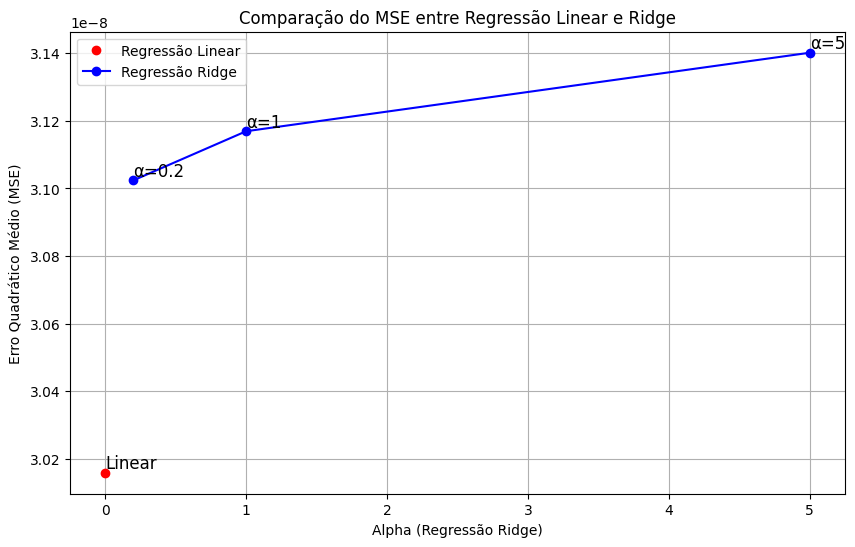

In [314]:
# Valores de MSE para cada alpha da Regressão Ridge
mse_ridge = list(ridge_mse_results.values())

# Valores de alpha
alpha_values = list(ridge_mse_results.keys())

# Criando o gráfico comparativo
plt.figure(figsize=(10, 6))

# Plotando o MSE da Regressão Linear
plt.plot([0], [mse_linear], 'ro', label='Regressão Linear')
plt.text(0, mse_linear, f'Linear', fontsize=12, verticalalignment='bottom')

# Plotando o MSE da Regressão Ridge para cada valor de alpha
plt.plot(alpha_values, mse_ridge, 'bo-', label='Regressão Ridge')

# Adicionando rótulos para cada ponto
for i, alpha in enumerate(alpha_values):
    plt.text(alpha, mse_ridge[i], f'α={alpha}', fontsize=12, verticalalignment='bottom')

# Adicionando títulos e rótulos
plt.title('Comparação do MSE entre Regressão Linear e Ridge')
plt.xlabel('Alpha (Regressão Ridge)')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()


# 2) Aprendizado Supervisionado - Classificação

In [315]:
# Definindo as classes e os intervalos
classes = {0.0: (-np.inf, -0.0025),
           1.0: (-0.0025, -0.0020),
           2.0: (-0.0020, -0.0015),
           3.0: (-0.0015, -0.0010),
           4.0: (-0.0010, -0.0005),
           5.0: (-0.0005, np.inf)}

# Criando uma lista de intervalos e uma lista de rótulos (classes)
intervals = list(classes.values())
labels = list(classes.keys())

# Função para discretizar uma coluna
def discretize_column(column):
    return pd.cut(column, bins=[i[0] for i in intervals] + [intervals[-1][1]], labels=labels, include_lowest=True)

# Criando um novo DataFrame para as colunas discretizadas
df_discretizado = df[variaveis_interesse].copy()

# Aplicando a discretização a todas as colunas numéricas
for column in df.select_dtypes(include=[np.number]).columns:
    df_discretizado[column] = discretize_column(df[column])

df_discretizado.head()


,ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,DiffSeTime1,DiffSeTime3,DiffSeTime5,DiffSeTime7,DiffSeTime9,DiffSeTime11,DiffSeTime13,Alpha,Se,Goal
0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0
1,0.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
2,0.0,5.0,0.0,5.0,5.0,5.0,0.0,0.0,0.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
3,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,1.0,0.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
4,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0


In [316]:
# Extraindo as variáveis preditoras e a coluna alvo do DataFrame
X = df_discretizado.drop(columns=['Goal'])  # Todas as colunas exceto 'Goal'
y = df_discretizado['Goal']  # Coluna alvo 'Goal'

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))  # Ajusta o zero_division

# Coeficientes do modelo
coefficients = model.coef_

# Calculando os odds-ratios para os atributos escolhidos (AbsRoll e Alpha)
atributos = ['AbsRoll', 'Alpha']
indices_atributos = [X.columns.get_loc(attr) for attr in atributos]
odds_ratios = np.exp(coefficients[:, indices_atributos])

# Exibindo os odds-ratios para cada classe
for i, odds_ratio in enumerate(odds_ratios):
    print(f'Classe {i}:')
    for j, attr in enumerate(atributos):
        print(f'  Odds-ratio para {attr}: {odds_ratio[j]:.4f}')
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Acurácia do modelo: 0.56
Matriz de Confusão:
[[   0    0    0    3   15    0]
 [   0    0    0    8   44    0]
 [   0    0    0   24  178    0]
 [   0    0    0   67  632    0]
 [   0    0    0   52 1450   11]
 [   0    0    0    0  253   13]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.00      0.00      0.00        52
         2.0       0.00      0.00      0.00       202
         3.0       0.44      0.10      0.16       699
         4.0       0.56      0.96      0.71      1513
         5.0       0.54      0.05      0.09       266

    accuracy                           0.56      2750
   macro avg       0.26      0.18      0.16      2750
weighted avg       0.47      0.56      0.44      2750

Classe 0:
  Odds-ratio para AbsRoll: 1.0000
  Odds-ratio para Alpha: 0.5422

Classe 1:
  Odds-ratio para AbsRoll: 1.0000
  Odds-ratio para Alpha: 0.6297

Classe 2:
  Odds-ratio para Ab

In [317]:
# Extraindo as variáveis preditoras e a coluna alvo do DataFrame
X = df_discretizado.drop(columns=['Goal'])  # Todas as colunas exceto 'Goal'
y = df_discretizado['Goal']  # Coluna alvo 'Goal'

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o classificador Naive Bayes Gaussiano
model = GaussianNB()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))  # Ajusta o zero_division


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Acurácia do modelo: 0.15
Matriz de Confusão:
[[ 18   0   0   0   0   0]
 [ 42   6   0   0   3   1]
 [168  19   0   0  13   2]
 [546  58   0   0  85  10]
 [908 190   0   0 367  48]
 [139  22   0   0  80  25]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.01      1.00      0.02        18
         1.0       0.02      0.12      0.03        52
         2.0       0.00      0.00      0.00       202
         3.0       0.00      0.00      0.00       699
         4.0       0.67      0.24      0.36      1513
         5.0       0.29      0.09      0.14       266

    accuracy                           0.15      2750
   macro avg       0.17      0.24      0.09      2750
weighted avg       0.40      0.15      0.21      2750



In [318]:
# Definindo as profundidades máximas a serem testadas
depths = [3, 5, 7, 10]

# Extraindo as variáveis preditoras e a coluna alvo do DataFrame
X = df_discretizado.drop(columns=['Goal'])  # Todas as colunas exceto 'Goal'
y = df_discretizado['Goal']  # Coluna alvo 'Goal'

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterando sobre as profundidades máximas
for max_depth in depths:
    print(f"### Árvore de Decisão com max_depth={max_depth} ###")

    # Criando o modelo de Árvore de Decisão
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliar a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia do modelo: {accuracy:.2f}')

    # Avaliando o modelo
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))

    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))  # Ajusta o zero_division
    print("\n")


### Árvore de Decisão com max_depth=3 ###
Acurácia do modelo: 0.55
Matriz de Confusão:
[[   0    0    0    9    9    0]
 [   0    0    0   13   39    0]
 [   0    0    0   44  156    2]
 [   0    0    0  135  564    0]
 [   0    0    0  138 1364   11]
 [   0    0    0    2  254   10]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        18
         1.0       0.00      0.00      0.00        52
         2.0       0.00      0.00      0.00       202
         3.0       0.40      0.19      0.26       699
         4.0       0.57      0.90      0.70      1513
         5.0       0.43      0.04      0.07       266

    accuracy                           0.55      2750
   macro avg       0.23      0.19      0.17      2750
weighted avg       0.46      0.55      0.46      2750



### Árvore de Decisão com max_depth=5 ###
Acurácia do modelo: 0.55
Matriz de Confusão:
[[   0    0    0    4   14    0]
 [   0    0    0    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Acurácia do modelo: 0.54
Matriz de Confusão:
[[   1    0    0    9    8    0]
 [   0    0    2   15   35    0]
 [   0    1    6   63  131    1]
 [   2    0    7  147  539    4]
 [   0    3    7  162 1305   36]
 [   0    0    1   10  228   27]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.33      0.06      0.10        18
         1.0       0.00      0.00      0.00        52
         2.0       0.26      0.03      0.05       202
         3.0       0.36      0.21      0.27       699
         4.0       0.58      0.86      0.69      1513
         5.0       0.40      0.10      0.16       266

    accuracy                           0.54      2750
   macro avg       0.32      0.21      0.21      2750
weighted avg       0.47      0.54      0.47      2750





In [319]:
# Extraindo as variáveis preditoras e a coluna alvo do DataFrame
X = df_discretizado.drop(columns=['Goal']).astype(int)  # Todas as colunas exceto 'Goal'
y = df_discretizado['Goal'].astype(int)  # Coluna alvo 'Goal'

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo os parâmetros a serem testados
neighbors = [3, 5, 7, 10, 50, 100, 1000]

# Variáveis para armazenar os melhores resultados
best_k = None
best_accuracy = 0
best_confusion_matrix = None
best_classification_report = None

# Iterar sobre os diferentes valores de k
for k in neighbors:
    print(f"### KNN com n_neighbors={k} ###")

    # Criar o modelo KNN
    model = KNeighborsClassifier(n_neighbors=k)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia do modelo: {accuracy:.2f}')

    # Mostrar a matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:")
    print(confusion)

    # Mostrar o relatório de classificação
    classification = classification_report(y_test, y_pred, zero_division=0)  # Ajusta o zero_division
    print("\nRelatório de Classificação:")
    print(classification)
    print("\n")

    # Atualizar os melhores resultados
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_confusion_matrix = confusion
        best_classification_report = classification

# Exibir os melhores resultados
print(f"Melhor valor de n_neighbors: {best_k}")
print(f"Acurácia do melhor modelo: {best_accuracy:.2f}")
print("Matriz de Confusão do melhor modelo:")
print(best_confusion_matrix)
print("\nRelatório de Classificação do melhor modelo:")
print(best_classification_report)


### KNN com n_neighbors=3 ###


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Acurácia do modelo: 0.46
Matriz de Confusão:
[[   1    0    4    4    8    1]
 [   0    6    3   16   27    0]
 [   1   14   22   40  123    2]
 [   6   30   61  165  427   10]
 [   8   34   93  291 1037   50]
 [   7    1   14   44  174   26]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.04      0.06      0.05        18
           1       0.07      0.12      0.09        52
           2       0.11      0.11      0.11       202
           3       0.29      0.24      0.26       699
           4       0.58      0.69      0.63      1513
           5       0.29      0.10      0.15       266

    accuracy                           0.46      2750
   macro avg       0.23      0.22      0.21      2750
weighted avg       0.43      0.46      0.44      2750



### KNN com n_neighbors=5 ###
Acurácia do modelo: 0.49
Matriz de Confusão:
[[   0    0    2   10    6    0]
 [   0    0    3   19   30    0]
 [   0    0    9   80  112    1]
 [   0  

In [320]:
params = [[50, 4, 0.2],
          [50, 10, 1],
          [50, 10, 0.2],
          [50, 10, 0.04],
          [200, 4, 1],
          [200, 4, 0.2],
          [200, 4, 0.04],
          [200, 10, 0.2]]

# Extraindo as variáveis preditoras e a coluna alvo do DataFrame
X = df_discretizado.drop(columns=['Goal']).astype(int)  # Todas as colunas exceto 'Goal'
y = df_discretizado['Goal'].astype(int)   # Coluna alvo 'Goal'

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Determinar o número de classes no conjunto de dados
num_classes = len(df_discretizado['Goal'].unique())

# Iterar sobre os parâmetros
for param in params:
    n_estimators, max_depth, learning_rate = param

    # Criar o modelo XGBoost como classificador
    model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, objective='multi:softmax', num_class=num_classes)

    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar a acurácia do modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia do modelo para XGBoost com n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}: {accuracy:.2f}")

    # Mostrar a matriz de confusão
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))

    # Mostrar o relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Acurácia do modelo para XGBoost com n_estimators=50, max_depth=4, learning_rate=0.2: 0.57

Matriz de Confusão:
[[   0    0    0    3   10    0]
 [   0    0    0   10   38    0]
 [   0    0    0   34  156    0]
 [   0    0    1   93  569    3]
 [   0    0    0   86 1450   27]
 [   0    0    0    2  234   34]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00       190
           3       0.41      0.14      0.21       666
           4       0.59      0.93      0.72      1563
           5       0.53      0.13      0.20       270

    accuracy                           0.57      2750
   macro avg       0.25      0.20      0.19      2750
weighted avg       0.49      0.57      0.48      2750



Acurácia do modelo para XGBoost com n_estimators=50, max_depth=10, learning_rate=1: 0.54

Matriz de Confusão:
[[   0

# 3) Aprendizado por Reforço

In [321]:
# Parâmetros do Q-learning
alpha = 0.1
gamma = 0.99

epsilon_zero = 1.0  # valor inicial de epsilon
epsilon_min = 0.01  # valor final de epsilon
episodes = 8000  # Número máximo de episódios do treinamento
min_epsilon_episode = 5000  # Episódio que o epsilon mínimo é atingido

max_steps = 500  # Número máximo de passos no treinamento
epsilon = epsilon_zero
epsilon_decay = (epsilon_zero - epsilon_min) / min_epsilon_episode  # Decaimento Linear do Epsilon

# Define os bins para cada variável de estado
n_bins = 24  # Escolha um número de estados para cada variável
bins = [
    np.linspace(-4.8, 4.8, n_bins),  # Posição do Carrinho
    np.linspace(-4, 4, n_bins),      # Velocidade do Carrinho
    np.linspace(-0.418, 0.418, n_bins),  # Ângulo do Pêndulo
    np.linspace(-4, 4, n_bins)       # Velocidade Angular do Pêndulo
]

def discretize_state(state, bins):
    """
    Discretiza o estado contínuo em uma tupla de índices binarizados.
    """
    state_discretized = tuple(np.digitize(state[i], bins[i]) for i in range(len(state)))
    return state_discretized

# Inicialização da Q-table
state_space_size = tuple(len(bins[i]) + 1 for i in range(len(bins)))
action_space_size = 2  # O espaço de ação é discreto com 2 ações
Q = np.zeros(state_space_size + (action_space_size,))

def choose_action(state, Q, epsilon):
    """
    Escolhe a ação com base na política epsilon-greedy.
    """
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Ação aleatória
    else:
        return np.argmax(Q[state])  # Ação ótima

def update_q_table(Q, state, action, reward, next_state, alpha, gamma):
    """
    Atualiza a Q-table usando a fórmula de Q-learning.
    """
    best_next_action = np.argmax(Q[next_state])
    Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

# Criação do ambiente
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Armazenar os valores de epsilon e recompensas totais para plotagem
epsilon_values = []
rewards = []

# Treinamento da Q-table
for episode in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state, bins)
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state, Q, epsilon)
        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state, bins)

        update_q_table(Q, state, action, reward, next_state, alpha, gamma)

        state = next_state
        total_reward += reward

        if done:
            break

    # Armazenar o valor de epsilon e a recompensa total
    epsilon_values.append(epsilon)
    rewards.append(total_reward)

    # Decaimento do epsilon
    epsilon = max(epsilon_min, epsilon - epsilon_decay)

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

print("Training finished.\n")


Episode 1: Total Reward = 21.0
Episode 2: Total Reward = 25.0
Episode 3: Total Reward = 16.0
Episode 4: Total Reward = 14.0
Episode 5: Total Reward = 41.0
Episode 6: Total Reward = 12.0
Episode 7: Total Reward = 52.0
Episode 8: Total Reward = 14.0
Episode 9: Total Reward = 18.0
Episode 10: Total Reward = 12.0
Episode 11: Total Reward = 36.0
Episode 12: Total Reward = 12.0
Episode 13: Total Reward = 31.0
Episode 14: Total Reward = 18.0
Episode 15: Total Reward = 12.0
Episode 16: Total Reward = 19.0
Episode 17: Total Reward = 30.0
Episode 18: Total Reward = 15.0
Episode 19: Total Reward = 22.0
Episode 20: Total Reward = 11.0
Episode 21: Total Reward = 62.0
Episode 22: Total Reward = 14.0
Episode 23: Total Reward = 26.0
Episode 24: Total Reward = 25.0
Episode 25: Total Reward = 9.0
Episode 26: Total Reward = 12.0
Episode 27: Total Reward = 13.0
Episode 28: Total Reward = 29.0
Episode 29: Total Reward = 15.0
Episode 30: Total Reward = 62.0
Episode 31: Total Reward = 20.0
Episode 32: Total 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
Episode 3003: Total Reward = 67.0
Episode 3004: Total Reward = 60.0
Episode 3005: Total Reward = 69.0
Episode 3006: Total Reward = 70.0
Episode 3007: Total Reward = 144.0
Episode 3008: Total Reward = 102.0
Episode 3009: Total Reward = 75.0
Episode 3010: Total Reward = 115.0
Episode 3011: Total Reward = 48.0
Episode 3012: Total Reward = 98.0
Episode 3013: Total Reward = 95.0
Episode 3014: Total Reward = 88.0
Episode 3015: Total Reward = 58.0
Episode 3016: Total Reward = 63.0
Episode 3017: Total Reward = 69.0
Episode 3018: Total Reward = 77.0
Episode 3019: Total Reward = 14.0
Episode 3020: Total Reward = 72.0
Episode 3021: Total Reward = 149.0
Episode 3022: Total Reward = 66.0
Episode 3023: Total Reward = 53.0
Episode 3024: Total Reward = 128.0
Episode 3025: Total Reward = 76.0
Episode 3026: Total Reward = 119.0
Episode 3027: Total Reward = 41.0
Episode 3028: Total Reward = 78.0
Episode 3029: Total Reward = 100.0
Episode 3030: Total Rewa

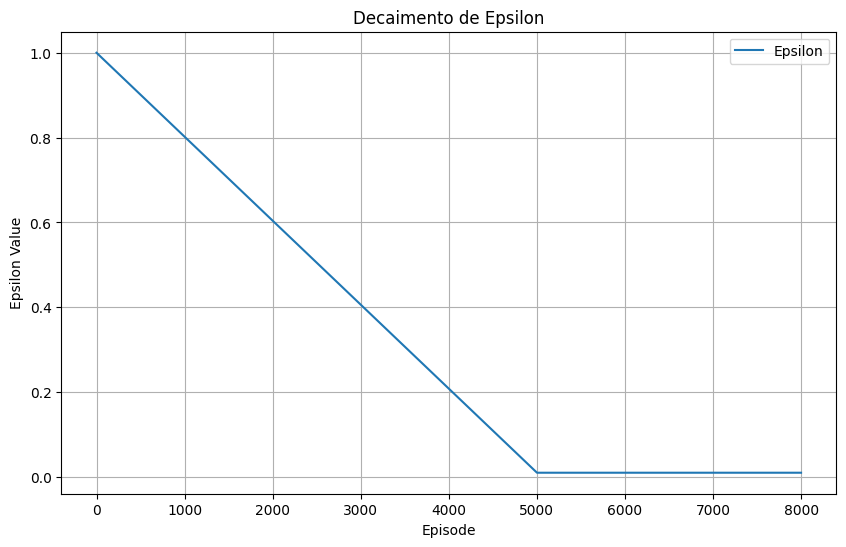

In [322]:
# Plotar a curva de epsilon
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, label='Epsilon')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Decaimento de Epsilon')
plt.legend()
plt.grid(True)
plt.show()

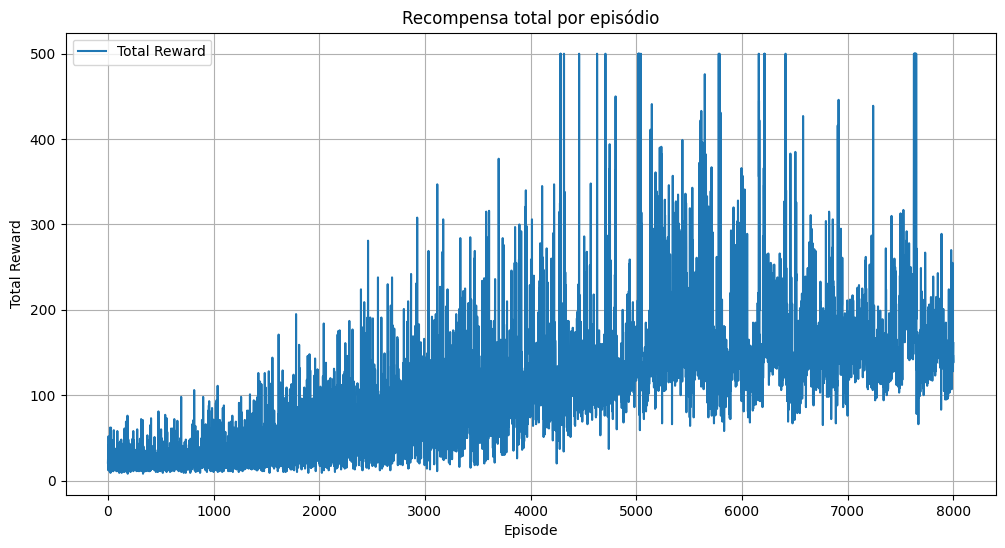

In [323]:
# Plotar a recompensa total por número de episódios
plt.figure(figsize=(12, 6))
plt.plot(range(1, episodes + 1), rewards, label='Total Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Recompensa total por episódio')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.state to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.state` for environment variables or `env.get_wrapper_attr('state')` that will search the reminding wrappers.
  logger.warn(


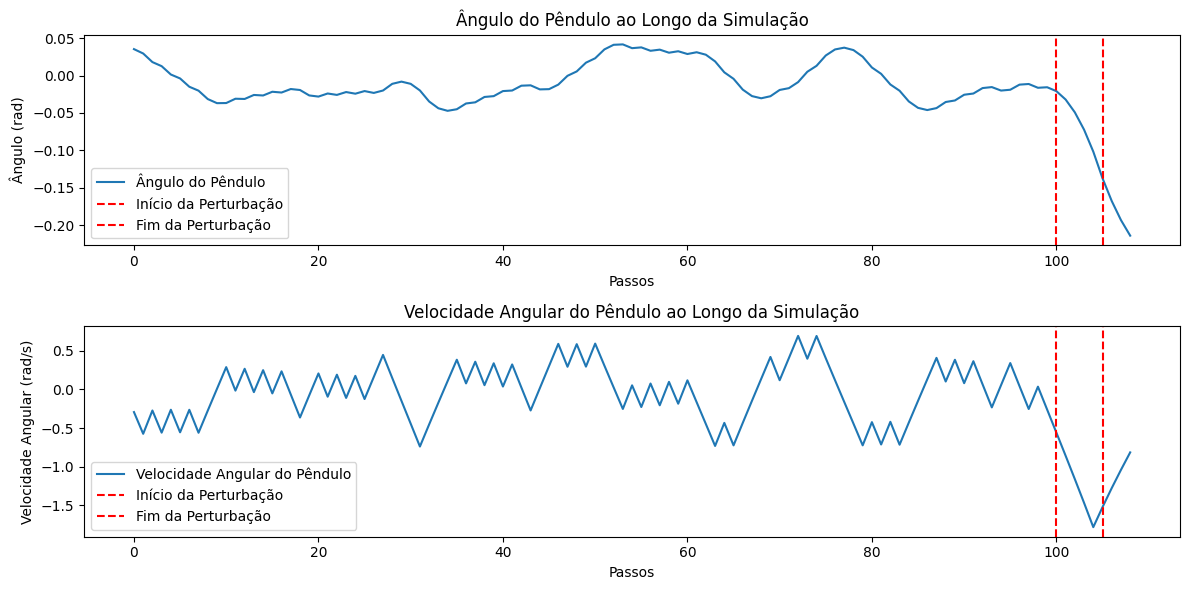

In [324]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def run_experiment(env, Q, bins):
    # Variáveis para armazenar ângulo e velocidade angular
    angles = []
    angular_velocities = []

    # Inicie um novo episódio
    state, _ = env.reset()
    state = discretize_state(state, bins)

    # Controle ótimo com a Q-table treinada nos 100 primeiros passos
    for step in range(100):
        action = choose_action(state, Q, epsilon=0)  # Controle ótimo
        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state, bins)

        # Armazenar os valores para o plot
        angles.append(env.state[2])  # Ângulo do pêndulo
        angular_velocities.append(env.state[3])  # Velocidade angular do pêndulo

        state = next_state
        if done:
            break

    # Ação fixa por 5 passos
    for _ in range(5):
        action = 1  # Carro para a direita
        next_state, reward, done, truncated, _ = env.step(action)

        # Armazenar os valores para o plot
        angles.append(env.state[2])  # Ângulo do pêndulo
        angular_velocities.append(env.state[3])  # Velocidade angular do pêndulo

    # Complete os 500 passos utilizando a Q-table treinada
    for step in range(500):
        action = choose_action(state, Q, epsilon=0)  # Controle ótimo
        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state, bins)

        # Armazenar os valores para o plot
        angles.append(env.state[2])  # Ângulo do pêndulo
        angular_velocities.append(env.state[3])  # Velocidade angular do pêndulo

        state = next_state
        if done:
            break

    return angles, angular_velocities

# Executar o experimento
angles, angular_velocities = run_experiment(env, Q, bins)

# Plotar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(angles, label='Ângulo do Pêndulo')
plt.axvline(x=100, color='r', linestyle='--', label='Início da Perturbação')
plt.axvline(x=105, color='r', linestyle='--', label='Fim da Perturbação')
plt.xlabel('Passos')
plt.ylabel('Ângulo (rad)')
plt.legend()
plt.title('Ângulo do Pêndulo ao Longo da Simulação')

plt.subplot(2, 1, 2)
plt.plot(angular_velocities, label='Velocidade Angular do Pêndulo')
plt.axvline(x=100, color='r', linestyle='--', label='Início da Perturbação')
plt.axvline(x=105, color='r', linestyle='--', label='Fim da Perturbação')
plt.xlabel('Passos')
plt.ylabel('Velocidade Angular (rad/s)')
plt.legend()
plt.title('Velocidade Angular do Pêndulo ao Longo da Simulação')

plt.tight_layout()
plt.show()

# Fechar o ambiente
env.close()
